In [2]:
%config Completer.use_jedi = False

In [1]:
# %load ../../../../useful_codes/importing_code.py
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
%config Completer.use_jedi = False

from matplotlib import rcParams 
rcParams['figure.figsize'] = 15,6

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [2]:
print(pd.__version__)

1.2.3


In [3]:
print(np.__version__)

1.19.2


In [10]:
col_names = ['age','workclass','fnlwgt','education','education_num','marital_status',\
            'occupation','relationship','race','sex','capital_gains','cpaital_losses',\
            'hrs_per_week','native_country','salary']

In [59]:
df = pd.read_csv('../../data/adult_training_data.csv', header=None,\
                 names=col_names, na_values='?', sep=', ')

<ipython-input-59-fc7b1130e623>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('../../data/adult_training_data.csv', header=None, names=col_names, na_values='?', sep=', ')


In [61]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [62]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [56]:
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [29]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gains,cpaital_losses,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
df.salary.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: salary, dtype: float64

In [64]:
df['income_class'] = np.where(df.salary=='>50K','high','low')

In [65]:
df.income_class.value_counts(normalize=True)

low     0.75919
high    0.24081
Name: income_class, dtype: float64

In [66]:
df.describe()

,age,fnlwgt,education_num,capital_gains,cpaital_losses,hrs_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [67]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [68]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gains', 'cpaital_losses', 'hrs_per_week',
       'native_country', 'salary', 'income_class'], dtype=object)

In [51]:
df.worktype.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [74]:
df['worktype'] = np.where(df.workclass.isin(['Local-gov','State-gov','Federal-gov']),'Government',df.workclass)

In [77]:
df['worktype'] = np.where(df.worktype.isin(['Self-emp-not-inc','Self-emp-inc']),'Self-Employed',df.worktype)

In [79]:
df['worktype'] = np.where(df.worktype.isin(['Without-pay','Never-worked']),'no-pay',df.worktype)

In [80]:
df.worktype.value_counts()

Private          22696
Government        4351
Self-Employed     3657
no-pay              21
Name: worktype, dtype: int64

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <BarContainer object of 10 artists>)

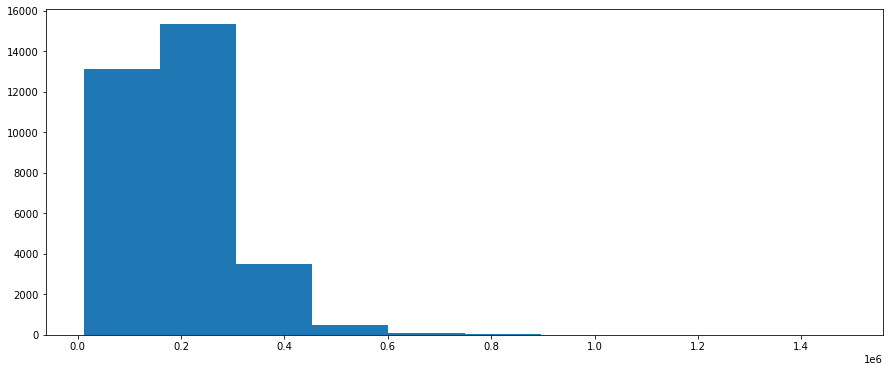

In [81]:
plt.hist(df.fnlwgt)

In [82]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [101]:
education_cnt = {}

In [102]:
for idx,val in df.education.value_counts().items():
    education_cnt[idx] = val

In [104]:
education_cnt

{'HS-grad': 10501,
 'Some-college': 7291,
 'Bachelors': 5355,
 'Masters': 1723,
 'Assoc-voc': 1382,
 '11th': 1175,
 'Assoc-acdm': 1067,
 '10th': 933,
 '7th-8th': 646,
 'Prof-school': 576,
 '9th': 514,
 '12th': 433,
 'Doctorate': 413,
 '5th-6th': 333,
 '1st-4th': 168,
 'Preschool': 51}

In [106]:
education_cnt.keys()

dict_keys(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool'])

In [109]:
education_cnt.values()

dict_values([10501, 7291, 5355, 1723, 1382, 1175, 1067, 933, 646, 576, 514, 433, 413, 333, 168, 51])

<BarContainer object of 16 artists>

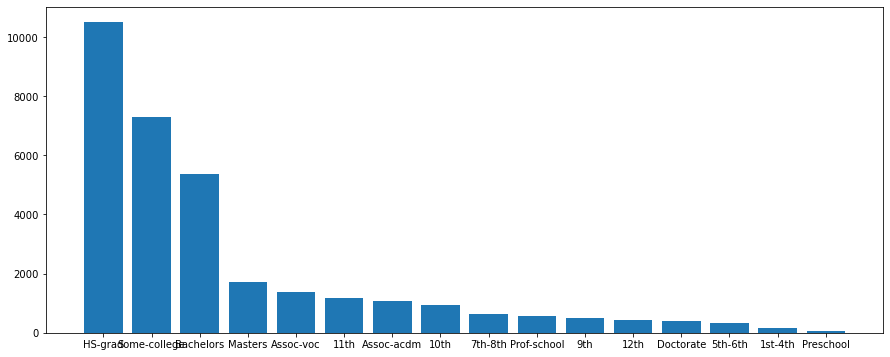

In [110]:
plt.bar(education_cnt.keys(), education_cnt.values())

Text(0, 0.5, 'Number of people')

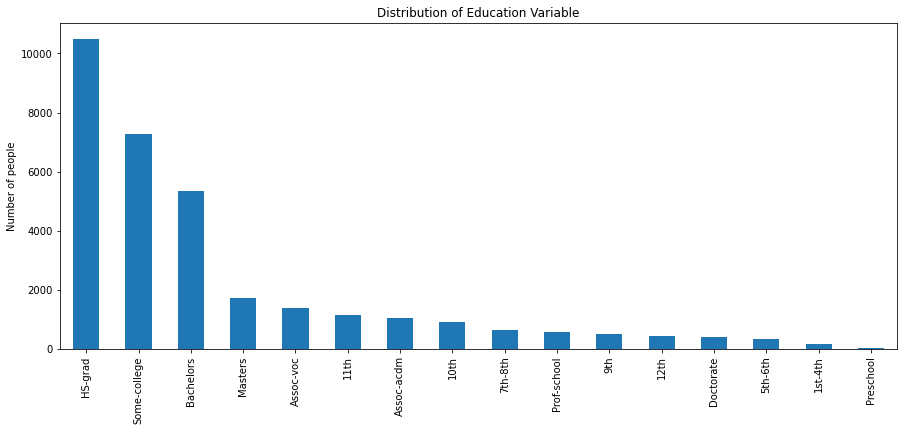

In [124]:
df.education.value_counts().plot(kind='bar')
plt.title('Distribution of Education Variable')
plt.ylabel('Number of people')

In [126]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64